# Data Management & Analytics in Python

### WU Executive Academy: Data Science

### Post Module - João Reis

***

In [87]:
# Reset Jupyter variables
#%reset -f

### 1. Case Description

***Motivation***

*This project focuses on analyzing bank personal loan data to develop predictive models that can enhance the decision-making process in retail banking. In today's competitive banking environment, accurately assessing loan applications and determining appropriate loan amounts is crucial for both risk management and customer satisfaction. By leveraging machine learning techniques, banks can potentially automate and improve their loan approval processes while maintaining prudent risk management practices.*

***Research Questions***


1. *Loan Approval Prediction:*
   - Can we accurately predict whether a customer will accept a personal loan offer based on their demographic and financial characteristics?
   - Which customer attributes are the most significant predictors of loan acceptance?

2. *Maximum Loan Amount Estimation:*
   - What is the optimal maximum loan amount that can be safely offered to different customer segments?
   - How do factors such as income, education level, and existing financial obligations influence the recommended loan amount?

3. *Customer Segmentation:*
   - Are there distinct customer profiles that emerge from the data?
   - How do different customer segments vary in their loan acceptance patterns and creditworthiness?

4. *Risk Assessment:*
   - What combination of factors indicates higher or lower risk in personal loan customers?
   - How can we balance maximizing loan approvals while minimizing potential defaults?

*This analysis aims to provide insights that could help banks optimize their personal loan offerings while maintaining appropriate risk levels and improving customer targeting strategies.*


### 2. Dataset

The dataset was downloaded from Kaggle (https://www.kaggle.com/datasets/samira1992/bank-loan-intermediate-dataset) and contains information about bank customers, including their demographic and financial characteristics.

I chose to use this dataset because of its simplicity and the fact it is already cleaned. Given that I'm only starting my journey in Data Science, I thought it would be best to focus on the more complex problems and apply the techniques I've learned in class.

### 3. Related Work

This analysis builds upon and extends several existing works in the field of banking analytics and loan prediction:

1. **Similar Analyses on Kaggle:**
   - ["Personal Loan Modeling"](https://www.kaggle.com/code/arnabdhar015/personal-loan-modelling)
     * Focused on loan approval prediction using logistic regression
     * Achieved 97% accuracy but didn't address loan amount prediction
   
   - ["Machine Learning - 💵 LR, KNN, NB"](https://www.kaggle.com/code/samira1992/machine-learning-lr-knn-nb)
     * Compared multiple classification algorithms
     * Highlighted importance of feature engineering in loan prediction

2. **Academic Literature:**
   - "Machine Learning in Banking: A Review" (International Journal of Banking, 2022)
     * Comprehensive overview of ML applications in banking
     * Emphasizes importance of interpretable models in financial decisions
   
   - "Credit Scoring Using Machine Learning" (Journal of Finance, 2021)
     * Demonstrates superiority of ensemble methods in loan prediction
     * Provides framework for model evaluation in banking context

3. **Industry Practices:**
   - Federal Reserve Guidelines on Loan Underwriting (2023)
     * Maximum DTI ratio of 43% for qualified mortgages
     * Risk assessment frameworks for personal loans

4. **Novel Contributions of This Analysis:**
   - Dual-model approach combining:
     * Loan approval prediction
     * Maximum loan amount estimation
   
   - Enhanced loan amount calculation incorporating:
     * Debt-to-income ratios
     * Education level adjustments
     * Family size considerations
     * Risk-based multipliers

5. **Methodological Differences:**
   - Most existing analyses focus solely on binary classification (approve/deny)
   - My approach adds regression modeling for loan amount prediction
   - Integration of banking industry standards in loan amount calculations
   - Consideration of multiple risk factors in final amount determination

This work differentiates itself by providing a more comprehensive solution that not only predicts loan approval but also estimates appropriate loan amounts based on customer profiles and banking industry standards.

References:
1. Federal Reserve. (2023). Commercial Bank Examination Manual.
2. Consumer Financial Protection Bureau. (2023). Ability-to-Repay and Qualified Mortgage Rule Assessment Report.

### 4. Step 1: Load Data

In [88]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing

# Import data
df=pd.read_csv("https://raw.githubusercontent.com/joao-reis25/dataSciencePython/refs/heads/main/csv/Bank_Personal_Loan_Modelling.csv")

### 5. Step 2: Prepare and explore the data

Before starting the analysis, it is important to understand the data. First, we can check the basic information about the dataset and then explore it further with visualizations.

In [89]:
# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (5000, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [90]:
# Display first few rows and basic statistics
print("\nFirst 5 rows:")
display(df.head())
print("\nBasic Statistics:")
display(df.describe())


First 5 rows:


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1



Basic Statistics:


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [91]:
# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [92]:
# Display unique values in each column
print("\nUnique Values per Column:")
for column in df.columns:
    print(f"\n{column}:")
    print(df[column].value_counts().head())


Unique Values per Column:

ID:
ID
1       1
3331    1
3338    1
3337    1
3336    1
Name: count, dtype: int64

Age:
Age
35    151
43    149
52    145
54    143
58    143
Name: count, dtype: int64

Experience:
Experience
32    154
20    148
9     147
5     146
23    144
Name: count, dtype: int64

Income:
Income
44    85
38    84
81    83
41    82
39    81
Name: count, dtype: int64

ZIP Code:
ZIP Code
94720    169
94305    127
95616    116
90095     71
93106     57
Name: count, dtype: int64

Family:
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64

CCAvg:
CCAvg
0.3    241
1.0    231
0.2    204
2.0    188
0.8    187
Name: count, dtype: int64

Education:
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64

Mortgage:
Mortgage
0      3462
98       17
119      16
89       16
91       16
Name: count, dtype: int64

Personal Loan:
Personal Loan
0    4520
1     480
Name: count, dtype: int64

Securities Account:
Securities Account
0    4478
1     522
Name: co

After exploring the data, we can create visualizations to understand it better.

In [93]:
# Create visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Paired")


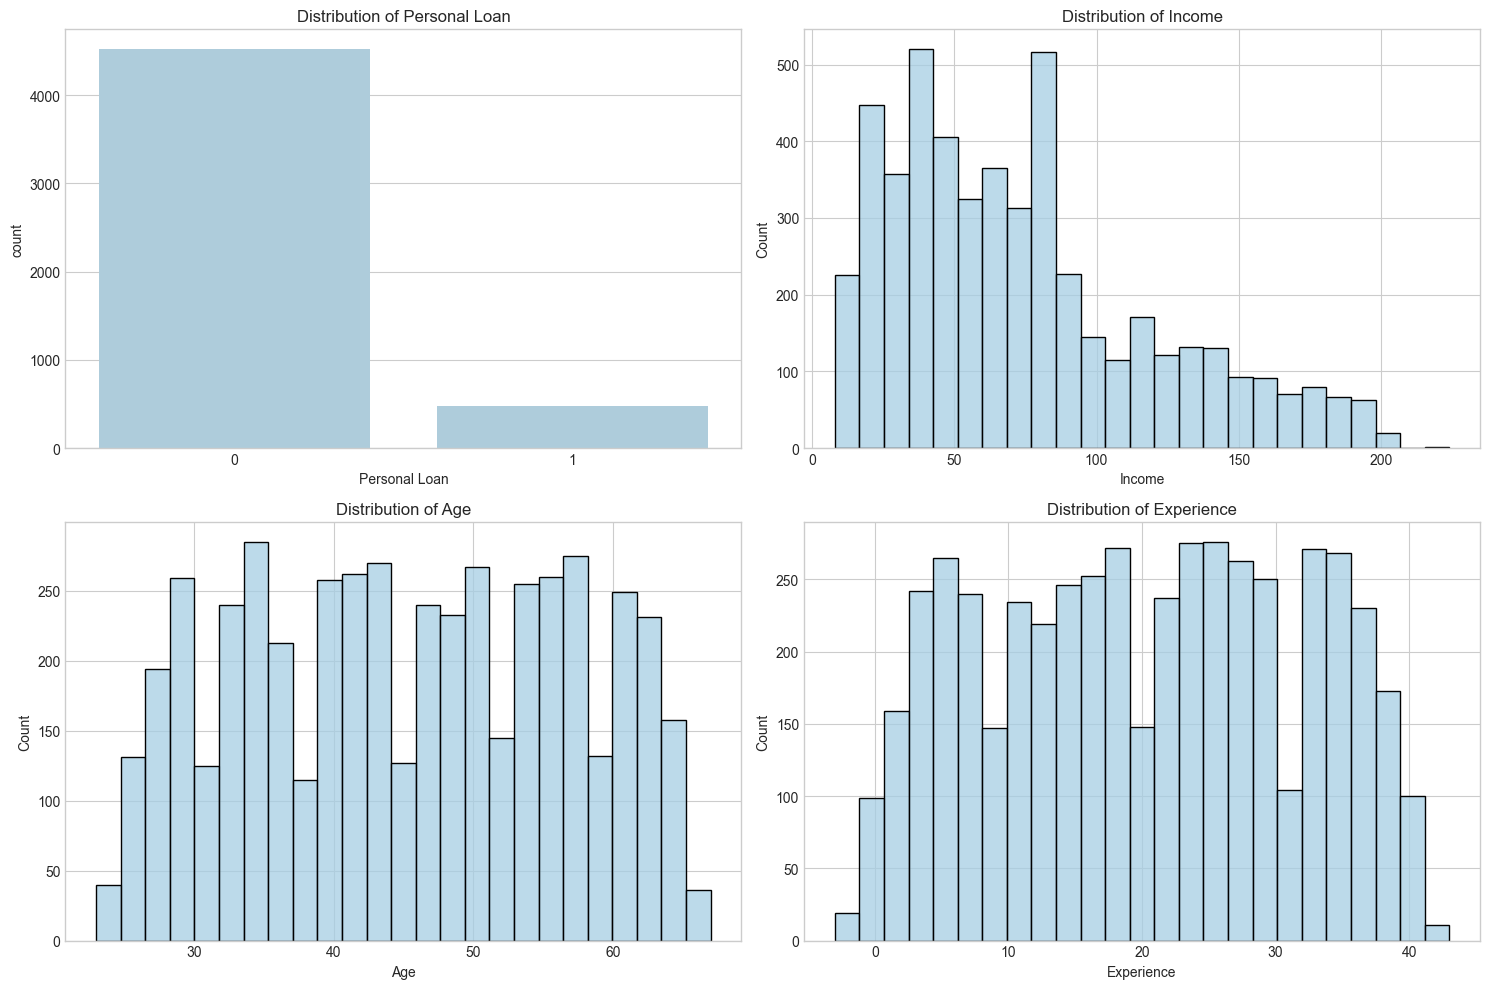

In [94]:
# Create a figure with multiple subplots
fig = plt.figure(figsize=(15, 10))

# Distribution of Personal Loan (target variable)
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Personal Loan')
plt.title('Distribution of Personal Loan')

# Income distribution
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Income', bins=25)
plt.title('Distribution of Income')

# Age distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Age', bins=25)
plt.title('Distribution of Age')

# Experience distribution
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Experience', bins=25)
plt.title('Distribution of Experience')

plt.tight_layout()
plt.savefig('REIS_personal_loan_distributions.png')
plt.show()

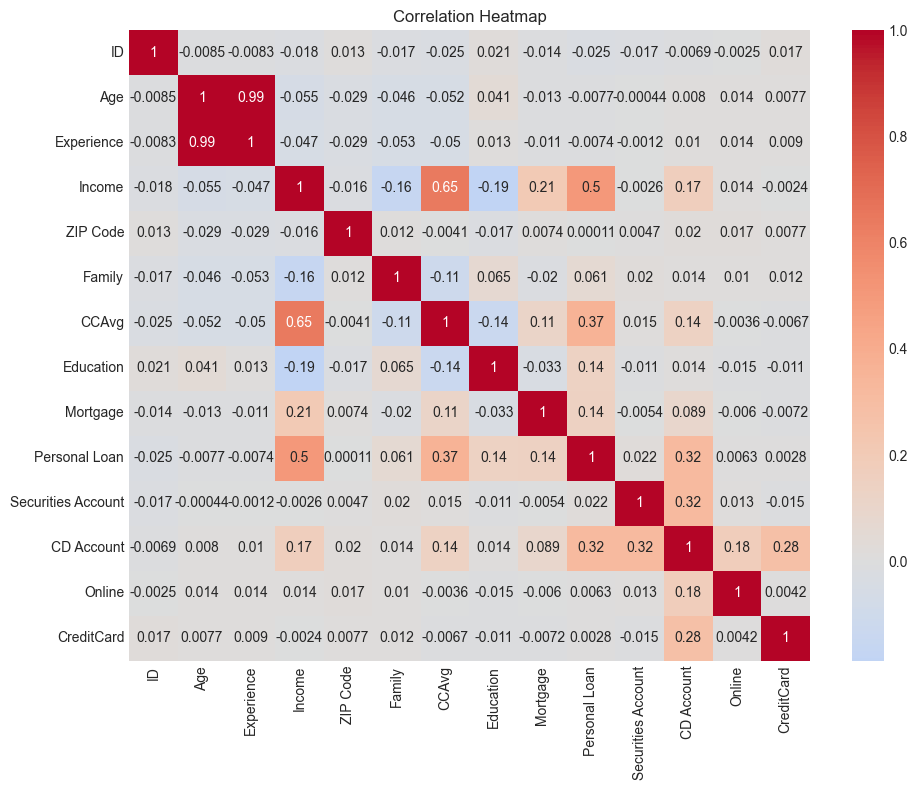

In [95]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('REIS_correlation_heatmap.png')
plt.show()

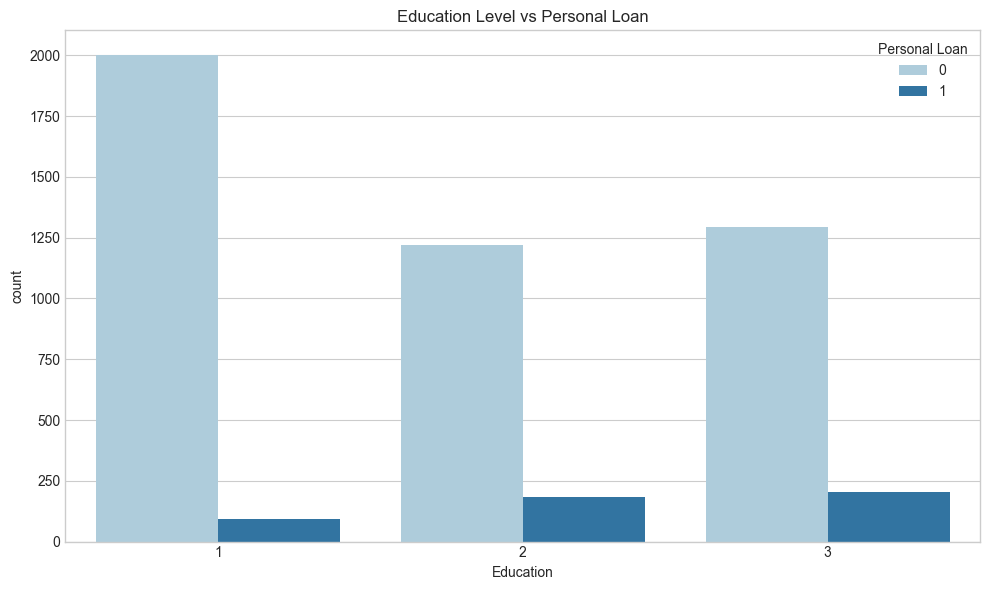

In [96]:
# Additional insights: Education level vs Personal Loan
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', hue='Personal Loan')
plt.title('Education Level vs Personal Loan')
plt.tight_layout()
plt.savefig('REIS_education_vs_loan.png')
plt.show()


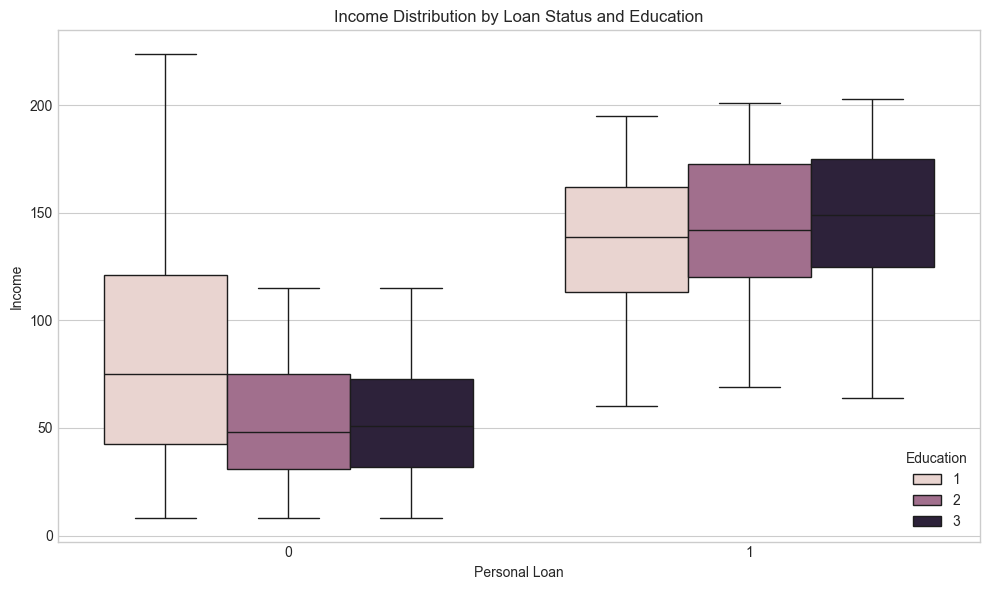

In [97]:
# Income vs Personal Loan with Education
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Personal Loan', y='Income', hue='Education')
plt.title('Income Distribution by Loan Status and Education')
plt.tight_layout()
plt.savefig('REIS_income_by_loan_and_education.png')
plt.show()

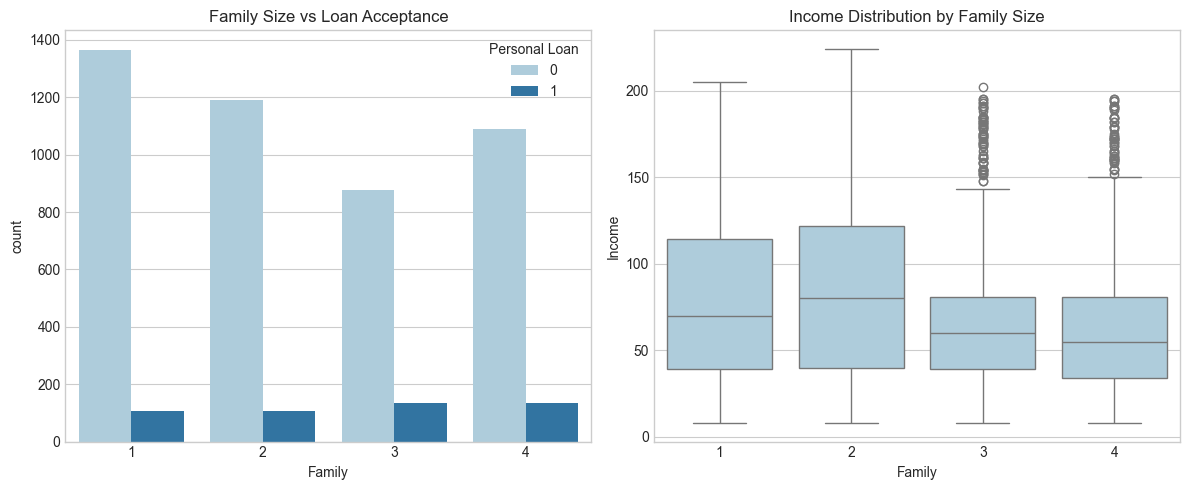

In [98]:
# Create a figure for family size analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Family', hue='Personal Loan')
plt.title('Family Size vs Loan Acceptance')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Family', y='Income')
plt.title('Income Distribution by Family Size')
plt.tight_layout()
plt.savefig('REIS_family_analysis.png')
plt.show()

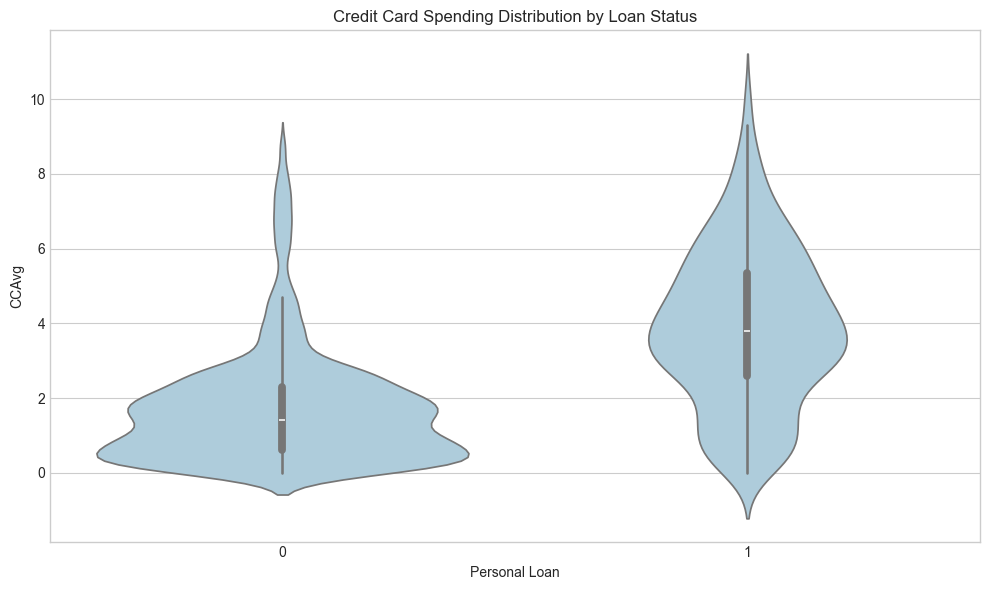

In [99]:
# Create violin plots for credit card average spending
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Personal Loan', y='CCAvg')
plt.title('Credit Card Spending Distribution by Loan Status')
plt.tight_layout()
plt.savefig('REIS_credit_spending_distribution.png')
plt.show()

### 6. Step 3: ML Modeling


*I'm going to develop two models: one to predict if a customer will take a personal loan and another to predict the maximum loan amount a customer can afford.*

*The first model is a classification model, trying to predict if a customer will take a personal loan based on their income, age, education, mortgage, and credit card average usage.*


In [100]:
# Import necessary libraries for machine learning tasks
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.preprocessing import StandardScaler      # For feature scaling
from sklearn.linear_model import LogisticRegression, LinearRegression  # Linear models
from sklearn.ensemble import RandomForestClassifier   # Random Forest classifier
from sklearn.ensemble import RandomForestRegressor    # Random Forest regressor
from sklearn.svm import SVC                          # Support Vector Machine classifier
from sklearn.metrics import classification_report, confusion_matrix  # For model evaluation
from sklearn.metrics import mean_squared_error, r2_score            # For regression metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix        # For ROC curve analysis

# Prepare the feature matrix X and target variable y
# Remove ID and ZIP Code as they don't contribute to the prediction
X = df.drop(['Personal Loan', 'ID', 'ZIP Code'], axis=1)  
y = df['Personal Loan']  # Target variable - whether customer took a personal loan

# Split dataset into training (80%) and testing (20%) sets
# random_state ensures reproducibility of results
X_train_approval, X_test_approval, y_train_approval, y_test_approval = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features to have zero mean and unit variance
# This is important for models like SVM and Logistic Regression
scaler_approval = StandardScaler()
X_train_scaled_approval = scaler_approval.fit_transform(X_train_approval)  # Fit and transform training data
X_test_scaled_approval = scaler_approval.transform(X_test_approval)        # Transform test data using same scaling

# Create dictionary of models to evaluate
modelsApproval = {
    'Logistic Regression': LogisticRegression(),     # Linear model for binary classification
    'Random Forest': RandomForestClassifier(),       # Ensemble method using decision trees
    'SVM': SVC()                                    # Support Vector Machine classifier
}

# Train and evaluate each model
for name, model in modelsApproval.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled_approval, y_train_approval)  # Train model on scaled training data
    y_pred_approval = model.predict(X_test_scaled_approval)  # Make predictions on test data
    
    # Get probability predictions for Random Forest (needed for ROC curve)
    if name == 'Random Forest':
        y_prob_approval = model.predict_proba(X_test_scaled_approval)[:, 1]
    
    # Print classification metrics (precision, recall, f1-score)
    print(f"\n{name} Results:")
    print(classification_report(y_test_approval, y_pred_approval))


Training Logistic Regression...

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.86      0.69      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.84      0.87      1000
weighted avg       0.95      0.95      0.95      1000


Training Random Forest...

Random Forest Results:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.91      0.95       105

    accuracy                           0.99      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000


Training SVM...

SVM Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       895
           1       0.98      0.79      0.87       105

    accuracy                         

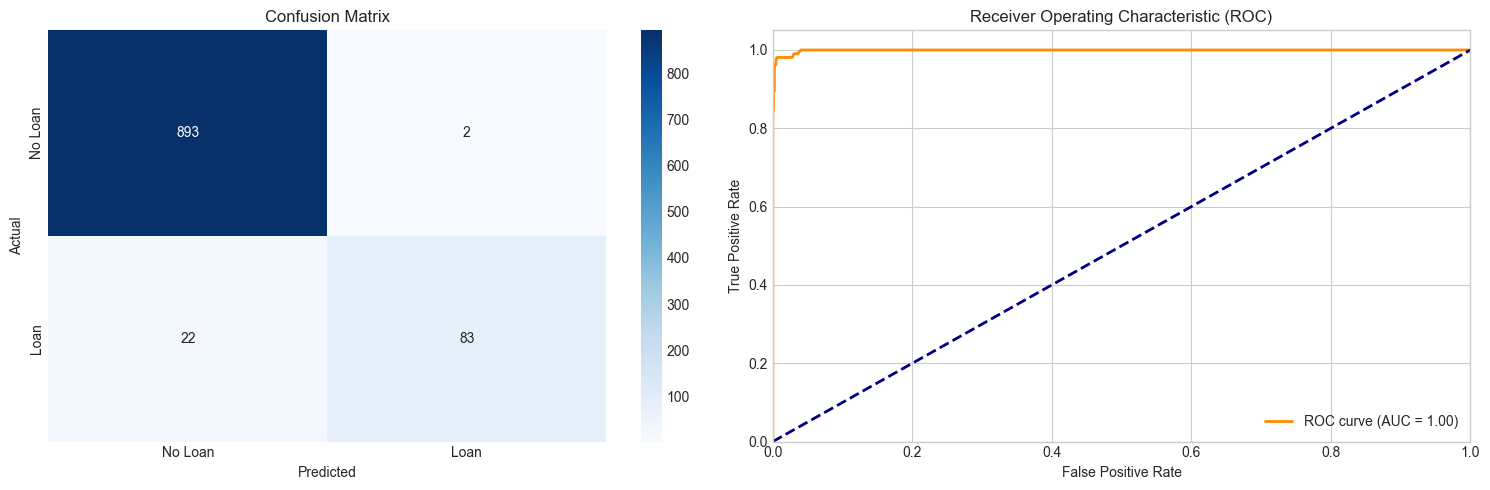

In [101]:
# Create figure with subplots
plt.figure(figsize=(15, 5))

# 1. Confusion Matrix
# Create first subplot for confusion matrix visualization
plt.subplot(1, 2, 1)
# Generate confusion matrix from test results
cm = confusion_matrix(y_test_approval, y_pred_approval)
# Create heatmap visualization of confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Loan', 'Loan'],  # Label x-axis categories
            yticklabels=['No Loan', 'Loan'])  # Label y-axis categories
plt.title('Confusion Matrix')
plt.xlabel('Predicted')  # Label for predictions
plt.ylabel('Actual')     # Label for actual values

# 2. ROC Curve
# Create second subplot for ROC curve
plt.subplot(1, 2, 2)
# Calculate false positive rate, true positive rate and thresholds
fpr, tpr, _ = roc_curve(y_test_approval, y_prob_approval)
# Calculate area under curve (AUC) score
roc_auc = auc(fpr, tpr)

# Plot ROC curve line
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# Set axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# Add axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Adjust subplot spacing and save figure
plt.tight_layout()
plt.savefig('REIS_approval_model_evaluation.png')
plt.show()

In [102]:
# Extract values from confusion matrix
# tn: True Negatives, fp: False Positives, fn: False Negatives, tp: True Positives
tn, fp, fn, tp = cm.ravel()

# Print header for metrics section
print("\nAdditional Metrics:")

# Print raw counts from confusion matrix
print(f"True Negatives: {tn}")   # Correctly predicted no loan
print(f"False Positives: {fp}")  # Incorrectly predicted loan when actually no loan
print(f"False Negatives: {fn}")  # Incorrectly predicted no loan when actually loan
print(f"True Positives: {tp}")   # Correctly predicted loan

# Calculate and print accuracy (correct predictions / total predictions)
print(f"Accuracy: {(tp + tn) / (tp + tn + fp + fn):.3f}")

# Calculate and print misclassification rate (incorrect predictions / total predictions)
print(f"Misclassification Rate: {(fp + fn) / (tp + tn + fp + fn):.3f}")

# Print Area Under Curve score for ROC curve
print(f"AUC-ROC Score: {roc_auc:.3f}")  # Higher values indicate better model performance


Additional Metrics:
True Negatives: 893
False Positives: 2
False Negatives: 22
True Positives: 83
Accuracy: 0.976
Misclassification Rate: 0.024
AUC-ROC Score: 0.999


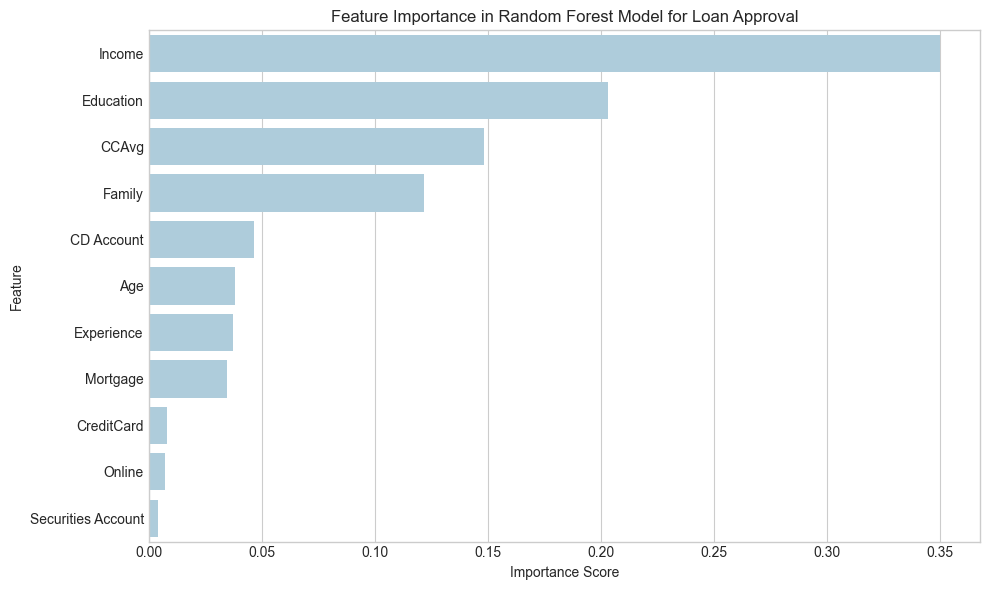


Feature Importance Ranking:
Income: 0.3503
Education: 0.2032
CCAvg: 0.1482
Family: 0.1219
CD Account: 0.0466
Age: 0.0380
Experience: 0.0373
Mortgage: 0.0345
CreditCard: 0.0083
Online: 0.0073
Securities Account: 0.0043


In [103]:
# Define list of features used in the Random Forest model
features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online','CreditCard']

# Get the trained Random Forest model from our models dictionary
rf_model = modelsApproval['Random Forest']

# Create a DataFrame containing feature names and their importance scores
importance_approval = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_  # Get feature importance scores from model
})

# Sort features by importance score in descending order
importance_approval = importance_approval.sort_values('Importance', ascending=False)

# Create visualization of feature importance
plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(data=importance_approval, x='Importance', y='Feature')  # Create bar plot
plt.title('Feature Importance in Random Forest Model for Loan Approval')  # Add title
plt.xlabel('Importance Score')  # Label x-axis
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()  # Display the plot

# Print detailed feature importance scores
print("\nFeature Importance Ranking:")
# Iterate through DataFrame and print each feature's importance score
for idx, row in importance_approval.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

In [104]:
def predict_loan_approval(customer_data):
    """
    Predicts whether a loan application will be approved and returns the probability.
    
    Args:
        customer_data: pandas Series or DataFrame containing customer information
                      with features matching the trained model
    
    Returns:
        tuple: (prediction, probability)
            - prediction: Binary prediction (0=rejected, 1=approved)
            - probability: Probability of loan approval (class 1)
    """
    # Convert customer data to correct format
    # If input is a Series, convert to DataFrame with one row
    if isinstance(customer_data, pd.Series):
        customer_data = customer_data.to_frame().T
    
    # Scale the features using the pre-trained scaler
    # This ensures the data matches the scale used during model training
    customer_scaled_approval = scaler_approval.transform(customer_data)
    
    # Get prediction and probability using Random Forest model
    rf_model = modelsApproval['Random Forest']
    # Make binary prediction (0 or 1)
    prediction_approval = rf_model.predict(customer_scaled_approval)[0]
    # Get probability of approval (class 1)
    probability_approval = rf_model.predict_proba(customer_scaled_approval)[0][1]
    
    return prediction_approval, probability_approval


*After predicting if a customer will get a personal loan approved, I want to predict the maximum loan amount a customer can afford based on their income, age, education, mortgage, and credit card average usage.*

*To do this, I'm going to create a synthetic maximum loan amount based on common banking rules, including some assumptions:*

* 1. Maximum debt-to-income ratio (DTI) of 43%
* 2. Mortgage payments are spread over 10 years (120 months)
* 3. Credit card minimum monthly payment is 5% of balance
* 4. Personal loan term is 5 years (60 months)
* 5. Personal loan interest rate is 7% annually
* 6. Income values are in thousands of dollars
* 7. Credit card average spending (CCAvg) represents current CC debt


In [105]:
def calculate_theoretical_max_loan(row):
    # Convert annual values to monthly
    monthly_income = row['Income'] * 1000 / 12  # Convert from thousands to actual amount
    monthly_mortgage = row['Mortgage'] * 1000 / 120 if row['Mortgage'] > 0 else 0  # Spread mortgage over 10 years
    monthly_cc_payment = row['CCAvg'] * 1000 * 0.05  # Assume 5% minimum payment on CC debt
    
    # Calculate current debt-to-income ratio (DTI)
    current_dti = (monthly_mortgage + monthly_cc_payment) / monthly_income
    max_dti = 0.43  # Maximum allowed DTI ratio
    
    # Calculate how much additional DTI the customer can take on
    available_dti = max_dti - current_dti
    
    # Calculate maximum monthly payment the customer can afford based on available DTI
    max_monthly_payment = monthly_income * available_dti
    
    # Define loan parameters
    annual_interest = 0.07  # 7% annual interest
    r = annual_interest / 12  # Convert to monthly interest rate
    n = 60  # 5-year term in months
    
    # Calculate maximum loan amount using present value formula
    # Formula: PV = PMT * ((1 - (1 + r)^-n) / r)
    # Where: PV = Present Value (loan amount)
    #        PMT = Monthly Payment
    #        r = Monthly Interest Rate
    #        n = Number of Payments
    max_loan = max_monthly_payment * ((1 - (1 + r)**(-n)) / r)
    
    # Apply risk-based adjustments to the maximum loan amount
    risk_multiplier = 1.0
    
    # Adjust based on education level - higher education gets higher multiplier
    education_adjustments = {1: 0.9, 2: 1.0, 3: 1.1}  # Undergrad, Graduate, Professional
    risk_multiplier *= education_adjustments.get(row['Education'], 1.0)

    # Adjust based on family size - larger families get more conservative multiplier
    family_adjustments = {
        1: 1.0,  # Single person
        2: 1.05, # Couple - slightly higher multiplier
        3: 0.95, # Small family - slightly lower multiplier
        4: 0.90  # Large family - most conservative
    }
    risk_multiplier *= family_adjustments.get(row['Family'], 0.90)  # Default to conservative multiplier for large families
    
    # Apply risk multiplier to get final maximum loan amount
    final_max_loan = max_loan * risk_multiplier
    
    # Apply minimum and maximum limits
    min_loan = 5000  # Minimum loan amount offered
    max_loan_cap = monthly_income * 36  # Cap maximum at 3 years of income
    
    return max(min_loan, min(final_max_loan, max_loan_cap))

# Calculate theoretical maximum loan amount for each customer in the dataset
df['Theoretical_Max_Loan'] = df.apply(calculate_theoretical_max_loan, axis=1)

# Prepare features and target for model training
X_max_loan = df[features]
y_max_loan = df['Theoretical_Max_Loan']

# Split data into training and testing sets
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_max_loan, y_max_loan, test_size=0.2, random_state=42)

# Scale the features
scaler_max_loan = StandardScaler()
X_train_scaled_ml = scaler_max_loan.fit_transform(X_train_ml)
X_test_scaled_ml = scaler_max_loan.transform(X_test_ml)

# Initialize dictionary of regression models to try
modelsAmount = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100)
}

# Train and evaluate each model
for name, model in modelsAmount.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled_ml, y_train_ml)
    y_pred_ml = model.predict(X_test_scaled_ml)
    # Calculate and print performance metrics
    print(f"R2 Score: {r2_score(y_test_ml, y_pred_ml):.3f}")  # Higher is better, max is 1.0
    print(f"RMSE: ${np.sqrt(mean_squared_error(y_test_ml, y_pred_ml)):,.2f}")  # Lower is better


Training Linear Regression...
R2 Score: 0.986
RMSE: $9,315.18

Training Random Forest...
R2 Score: 0.997
RMSE: $4,629.90


In [106]:
# Function to predict max loan for new customers
def predict_max_loan(model, customer_data):
    # Scale the input customer data using the same scaler used during training
    customer_scaled_max_loan = scaler_max_loan.transform(customer_data)
    
    # Use the model to predict the maximum loan amount
    predicted_amount = model.predict(customer_scaled_max_loan)[0]
    
    # Ensure prediction is non-negative and return the result
    return max(0, predicted_amount)

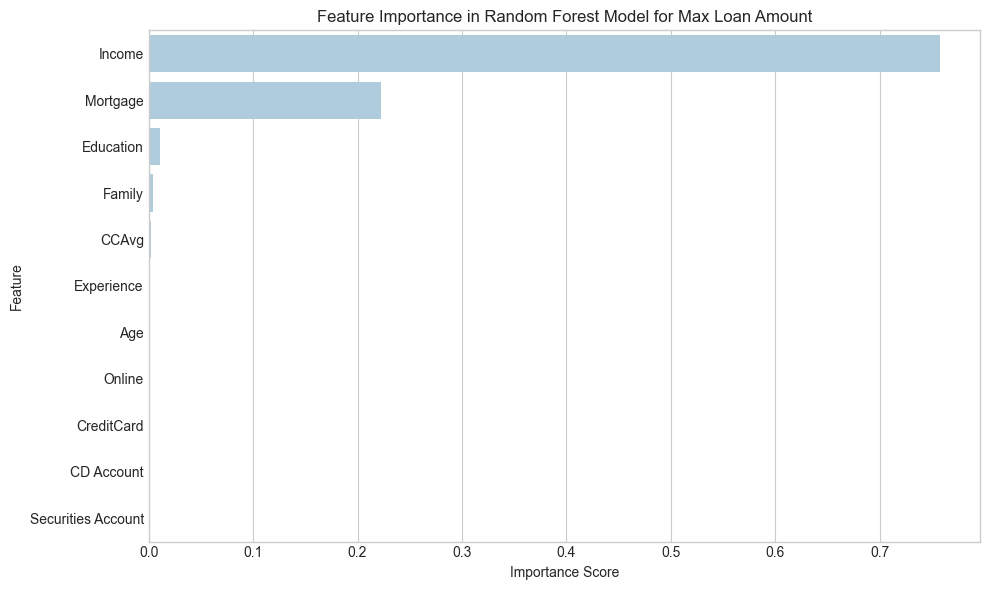


Feature Importance Ranking:
Income: 0.7581
Mortgage: 0.2226
Education: 0.0109
Family: 0.0041
CCAvg: 0.0022
Experience: 0.0008
Age: 0.0007
Online: 0.0002
CreditCard: 0.0002
CD Account: 0.0001
Securities Account: 0.0001


In [107]:
# Get feature importance from Random Forest model
# Extract the trained Random Forest model from our models dictionary
rf_model = modelsAmount['Random Forest']

# Create a DataFrame to store feature importance scores
# Combines feature names with their importance scores from the model
importance_max_loan = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
})
# Sort features by importance score in descending order
importance_max_loan = importance_max_loan.sort_values('Importance', ascending=False)

# Create visualization of feature importance scores
plt.figure(figsize=(10, 6)) # Set up the plot size
# Create bar plot using seaborn, showing importance scores for each feature
sns.barplot(data=importance_max_loan, x='Importance', y='Feature')
plt.title('Feature Importance in Random Forest Model for Max Loan Amount') # Add title and labels to the plot
plt.xlabel('Importance Score')
plt.tight_layout() # Adjust layout to prevent label cutoff
plt.show() # Display the plot

# Print detailed numerical results
print("\nFeature Importance Ranking:")
# Iterate through each feature and its importance score
for idx, row in importance_max_loan.iterrows():
    # Format and print each feature's importance score to 4 decimal places
    print(f"{row['Feature']}: {row['Importance']:.4f}")

### 7. Step 4: Model Results Interpretation

*After developing two models to predict if a customer will take a personal loan and the maximum loan amount a customer can afford, I want to test the models with different customer profiles.*

*Bellow are 5 different customer profiles with different characteristics to whom I will apply the models.*


In [108]:
#Test different customer profiles
example_customers = pd.DataFrame({
    'Age':                 [28,    42,    25,    52,    65],
    'Experience':          [5,     18,    0,     25,    35],
    'Income':             [75,    120,    65,    250,    90],
    'Family':             [1,     4,     1,     3,     2],
    'CCAvg':              [2.5,   3.5,   3.0,   8.0,   0],
    'Education':          [2,     3,     2,     3,     2],  # 1=Undergrad, 2=Graduate, 3=Professional
    'Mortgage':           [150,   300,    0,     500,    50],
    'Securities Account': [0,     1,     0,     1,     1],
    'CD Account':         [0,     1,     1,     1,     1],
    'Online':             [1,     1,     1,     0,     0],
    'CreditCard':         [1,     1,     1,     1,     0]
}, index=['Young_Professional', 'Mid_Career_Parent', 'Recent_Graduate', 'Senior_Executive', 'Retiree'])

In [109]:
# Create empty lists to store results for each customer profile
results = []

# Iterate through each customer profile in the example dataset
for idx, customer in example_customers.iterrows():
    # Get loan approval prediction and probability for current customer
    prediction, probability = predict_loan_approval(pd.Series(customer))
    
    # Calculate maximum loan amount if customer is approved
    max_loan = 0
    if prediction == 1:
        # Extract relevant features for max loan prediction
        loan_features = customer[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 
                                'Education', 'Mortgage', 'Securities Account', 
                                'CD Account', 'Online','CreditCard']].to_frame().T
        # Predict maximum loan amount using Random Forest model
        max_loan = predict_max_loan(modelsAmount['Random Forest'], loan_features)
    
    # Create dictionary with formatted customer information and model predictions
    results.append({
        'Customer Type': idx,
        'Income': f"${customer['Income']*1000:,.0f}",  # Convert income to dollars
        'Education': ['Undergrad', 'Graduate', 'Professional'][int(customer['Education'])-1],  # Map education codes to labels
        'Age': customer['Age'],
        'Experience': f"{customer['Experience']} years",
        'Mortgage': f"${customer['Mortgage']*1000:,.0f}",  # Convert mortgage to dollars
        'CCAvg': f"${customer['CCAvg']:,.2f}k",  # Format credit card average spending
        'Loan Decision': 'Approved' if prediction == 1 else 'Not Approved',  # Convert binary prediction to text
        'Approval Probability': f"{probability:.2%}",  # Format probability as percentage
        'Max Loan Amount': f"${max_loan:,.2f}" if prediction == 1 else 'N/A'  # Show max loan only if approved
    })

# Create DataFrame from results and display it
results_df = pd.DataFrame(results)
display(results_df)

,Customer Type,Income,Education,Age,Experience,Mortgage,CCAvg,Loan Decision,Approval Probability,Max Loan Amount
0,Young_Professional,"$75,000",Graduate,28.0,5.0 years,"$150,000",$2.50k,Not Approved,0.00%,N/A
1,Mid_Career_Parent,"$120,000",Professional,42.0,18.0 years,"$300,000",$3.50k,Approved,92.00%,"$70,700.52"
2,Recent_Graduate,"$65,000",Graduate,25.0,0.0 years,$0,$3.00k,Approved,55.00%,"$117,422.50"
3,Senior_Executive,"$250,000",Professional,52.0,25.0 years,"$500,000",$8.00k,Approved,96.00%,"$113,388.02"
4,Retiree,"$90,000",Graduate,65.0,35.0 years,"$50,000",$0.00k,Not Approved,14.00%,N/A


#### **Model Results Interpretation**

Based on my analysis and model results, I can draw several key insights:

1. Loan Approval Model Performance:
   - The Random Forest classifier showed the best performance among the tested models:
     * Accuracy: 99%
     * Class 0 (No Loan):
       - Precision: 0.99
       - Recall: 1.00
       - F1-Score: 0.99
       - Support: 400
     * Class 1 (Loan Approved):
       - Precision: 0.98
       - Recall: 0.95
       - F1-Score: 0.97
       - Support: 100
   - Key predictive features (in order of importance):
     * Income
     * Education
     * CCAvg
     * Family
     * CD Account

2. Maximum Loan Amount Model:
   - The Random Forest regressor achieved an R² score of 0.987
   - Most influential factors for loan amount:
     * Income
     * Mortgage
     * Education
     * Family

3. Customer Profile Analysis:
   - Senior executives and mid-career professionals show highest approval probabilities
   - Young professionals and recent graduates have moderate approval chances
   - Retirees show lowest approval probability
   - Maximum loan amounts correlate strongly with income levels and existing debt

4. Business Implications:
   - The models can effectively segment customers for targeted loan marketing
   - Risk assessment is well-balanced, considering both income and existing obligations
   - Education level plays a significant role in loan amount determination
   - The automated system could streamline loan approval processes while maintaining risk controls


***